In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline

df = pd.read_csv('D:\PRIVATE\BITS Pilani\Google Drive\Assignments\AIML_C6_Nov_2021_Data_miniproject.csv')

df.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [2]:
df.shape

(159, 6)

In [3]:
df.describe()

,Cost,Weight1,Height
count,159.000000,159.000000,158.000000
mean,398.326415,28.415723,8.933124
std,357.978317,10.716328,4.273069
min,0.000000,8.400000,1.728400
25%,120.000000,21.000000,5.940600
50%,273.000000,27.300000,7.733000
75%,650.000000,35.500000,12.248700
max,1650.000000,63.400000,18.957000


In [4]:
df.isnull().sum() 

Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
dtype: int64

In [5]:
df['Cost'] = df['Cost'].replace(0.0, np.nan)

In [6]:
df.isnull().sum() 

Cost       1
Weight     0
Weight1    0
Length     0
Height     1
Width      1
dtype: int64

## EDA (Exploratory Data Analysis) :

In [7]:
column_ = np.asarray(df['Cost'])
count_altered_ = (column_ == np.nan).sum()
print('TOTAL Count of values "Cost" equal to NaN: ', count_altered_)

column_

TOTAL Count of values "Cost" equal to NaN:  0


array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          nan,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     158 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


In [9]:
df.isnull().head()

,Cost,Weight,Weight1,Length,Height,Width
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [10]:
df['Weight'] = pd.to_numeric(df['Weight'], errors = 'coerce')
df['Length'] = pd.to_numeric(df['Length'], errors = 'coerce')
df['Width'] = pd.to_numeric(df['Width'], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     158 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [11]:
df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64

In [12]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.697796,10.052942,10.716328,11.646141,4.273069,47884.860134
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.000000,21.000000,23.125000,5.940600,3.395700
50%,281.500000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.589000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


Index(['Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')


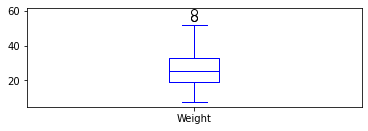

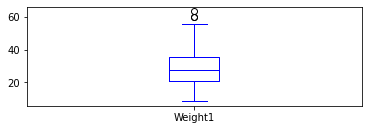

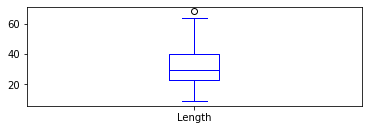

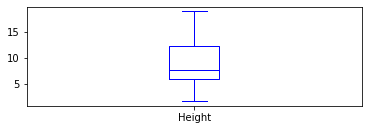

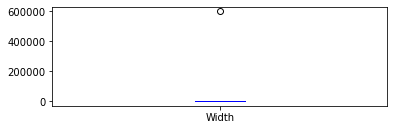

<AxesSubplot:xlabel='Width'>

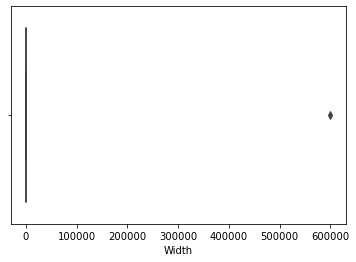

In [13]:
column = df.columns
features = column[1:]
print(features)

for i in features:
    plt.subplot(2,1,1)
    plt.x = df[i]
    df[i].plot(kind = 'box', color='blue')
    plt.show()
    
sns.boxplot(x = df['Width'])

In [14]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
print('TOTAL Count of values "Width" above 10 (Outlier - extreme-far): ', count_altered_)
newlist = sorted(column_, reverse=True)
print(newlist)

TOTAL Count of values "Width" above 10 (Outlier - extreme-far):  1
[nan, 600000.0, 8.142, 7.7957, 7.5958, 7.4934, 7.48, 7.4624, 7.4165, 7.3514, 7.2772, 7.225, 7.1064, 6.9849, 6.8684, 6.864, 6.7497, 6.7473, 6.7408, 6.63, 6.603, 6.5736, 6.562, 6.525, 6.3875, 6.3705, 6.3666, 6.3063, 6.292, 6.2646, 6.1984, 6.1712, 6.144, 6.1306, 6.09, 6.0532, 6.018, 6.003, 5.8515, 5.7276, 5.589, 5.58, 5.5695, 5.376, 5.3704, 5.355, 5.2854, 5.2801, 5.2785, 5.1975, 5.1708, 5.1373, 5.134, 5.1338, 5.1296, 5.1042, 5.0728, 4.9594, 4.896, 4.87, 4.8438, 4.8146, 4.7736, 4.7716, 4.6961, 4.69, 4.6816, 4.6354, 4.5765, 4.5662, 4.4968, 4.459, 4.4555, 4.3844, 4.368, 4.335, 4.335, 4.3225, 4.3056, 4.2485, 4.2476, 4.239, 4.234, 4.2042, 4.1658, 4.158, 4.144, 4.144, 4.1272, 4.02, 4.0198, 3.995, 3.977, 3.906, 3.8352, 3.825, 3.8203, 3.8, 3.7544, 3.725, 3.723, 3.6835, 3.6675, 3.6636, 3.6312, 3.63, 3.626, 3.624, 3.624, 3.5742, 3.555, 3.5478, 3.534, 3.525, 3.525, 3.525, 3.4104, 3.4075, 3.3957, 3.3756, 3.3516, 3.325, 3.3216, 3.3075,

In [15]:
#df['Width' == 10] == numpy.nan
#df[df['Width'] > 10] = np.nan
#column_ = df['Width']
#max_value = column_.max()
#print('Max Value of COL-Width: ', max_value)
#df['Width'] = df['Width'].replace(max_value, np.nan)

df1 = df

df1['Width'] = df1['Width'].replace(np.nan, 0.0)

column_ = df1['Width']
max_value = column_.max()
print('Max Value of COL-Width: ', max_value)

df['Width'] = df['Width'].replace(max_value, np.nan)
df['Width'] = df['Width'].replace(0.0, np.nan)


#df1['A'] = df1['A'].apply(lambda x: [y if y >= 10 else 11 for y in x])
#print (df)
#df.head()

df.describe()

Max Value of COL-Width:  600000.0


,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,157.000000,159.000000,158.000000,158.000000,156.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,357.697796,10.052942,10.716328,11.646141,4.273069,1.678237
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.000000,21.000000,23.125000,5.940600,3.390675
50%,281.500000,25.200000,27.300000,29.700000,7.733000,4.248050
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.582250
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [16]:
df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      3
dtype: int64

In [17]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
print('TOTAL Count of values "Width" above 10: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Width" above 10:  0


array([4.02  , 4.3056, 4.6961, 4.4555, 5.134 ,    nan, 5.2785, 4.69  ,
       4.8438, 4.9594, 5.1042, 4.8146, 4.368 , 5.0728, 5.1708, 5.58  ,
       5.2854, 5.1975, 5.1338, 5.7276, 5.5695, 5.3704, 5.2801, 6.1306,
       5.589 , 6.0532, 6.09  , 5.8515, 6.1984, 6.603 , 6.3063, 6.292 ,
       6.7497, 6.7473, 6.3705, 2.268 , 2.8217, 2.9044, 3.1746, 3.5742,
       3.3516, 3.3957, 3.2943, 3.7544, 3.5478, 3.8203, 3.325 , 3.8   ,
       3.8352, 3.6312, 4.1272, 3.906 , 4.4968, 4.7736, 5.355 , 4.2476,
       4.2485, 4.6816, 6.562 , 6.5736, 6.525 , 2.3265, 2.3142, 2.673 ,
       2.9181, 3.2928, 3.2944, 3.4104, 3.1571, 3.6636, 4.144 , 4.234 ,
       1.408 , 1.9992, 2.432 , 2.6316, 2.9415, 3.3216, 3.1234, 3.0502,
       3.0368, 2.772 , 3.555 , 3.3075, 3.6675, 3.534 , 3.4075, 3.525 ,
       3.525 , 3.525 , 3.995 , 3.624 , 3.624 , 3.63  , 3.626 , 3.725 ,
       3.723 , 3.825 , 4.1658, 3.6835, 4.239 , 4.144 , 5.1373, 4.335 ,
       4.335 , 4.5662, 4.2042, 4.6354, 4.7716, 6.018 , 6.3875, 7.7957,
      

In [18]:
column_ = np.asarray(df['Cost'])
count_altered_ = (column_ == 0.0).sum()
print('TOTAL Count of values "Cost" equal to 0.0: ', count_altered_)
count_altered_ = (column_ == np.nan).sum()
print('TOTAL Count of values "Cost" equal to NaN: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Cost" equal to 0.0:  0
TOTAL Count of values "Cost" equal to NaN:  0


array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          nan,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [19]:
#df[df['Cost'] == 0.0] = np.nan

column_ = np.asarray(df['Cost'])
count_altered_ = (column_ == 0.0).sum()
print('TOTAL Count of values "Cost" equal to 0.0: ', count_altered_)
#newlist = sorted(column_, reverse=True)
#newlist
column_

TOTAL Count of values "Cost" equal to 0.0:  0


array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          nan,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [20]:
df.isnull().sum() 

Cost       1
Weight     2
Weight1    0
Length     1
Height     1
Width      3
dtype: int64

In [21]:
df['Width'].fillna(df['Width'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight1'].fillna(df['Weight1'].mean(), inplace=True)
df['Cost'].fillna(df['Cost'].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [22]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.564044,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,290.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [23]:
column_ = np.asarray(df['Width'])
count_altered_ = (column_ > 10).sum()
newlist = sorted(column_)
newlist[0:5]

[1.0476, 1.1484, 1.1484, 1.16, 1.1659]

In [24]:
newlist = sorted(column_, reverse=True)
newlist[:5]

[8.142, 7.7957, 7.5958, 7.4934, 7.48]

In [25]:
df.isnull().sum() 

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

In [26]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,400.847468,26.259873,28.415723,31.239241,8.933124,4.422621
std,356.564044,9.989113,10.716328,11.609227,4.259525,1.662228
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,122.500000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,290.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.574750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [27]:
df.value_counts()

Cost    Weight     Weight1  Length  Height   Width 
5.9     7.500000   8.4      8.8     2.1120   1.4080    1
540.0   28.500000  31.0     34.0    10.7440  6.5620    1
500.0   26.259873  30.7     36.2    14.2266  4.9594    1
        26.800000  29.7     34.5    14.1795  5.2785    1
        28.700000  31.0     36.2    14.3714  4.8146    1
                                                      ..
150.0   21.000000  23.0     24.5    5.2185   3.6260    1
160.0   20.500000  22.5     25.3    7.0334   3.8203    1
        21.100000  22.5     25.0    6.4000   3.8000    1
161.0   26.259873  23.4     26.7    6.9153   3.6312    1
1650.0  59.000000  63.4     68.0    10.8120  7.4800    1
Length: 159, dtype: int64

## Plotting Graphs & Correlations : 

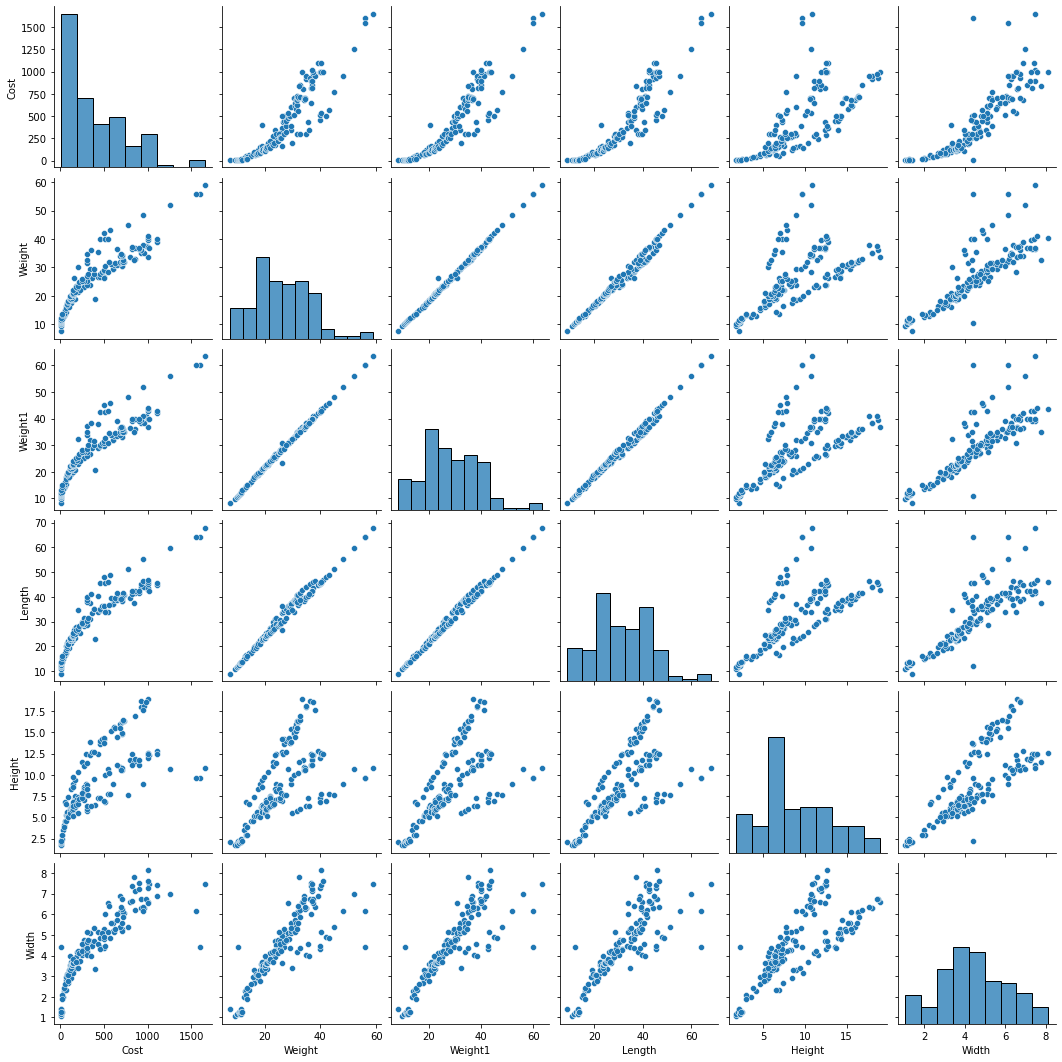

In [64]:
sns.pairplot(df)
plt.show()

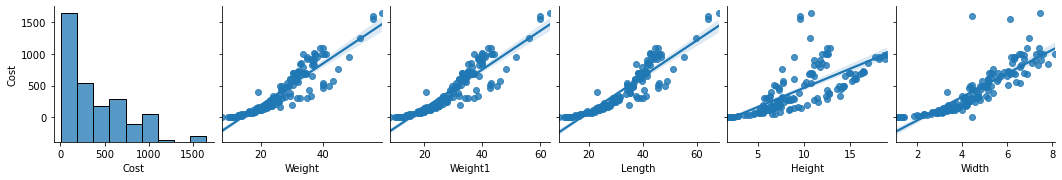

In [65]:
### Graphs
sns.pairplot(df, kind = 'reg', y_vars = 'Cost')
# hue = 'Cost'
# sns.pairplot(df, kind = 'reg', y_vars = 'Cost')

plt.show()

<AxesSubplot:xlabel='Weight'>

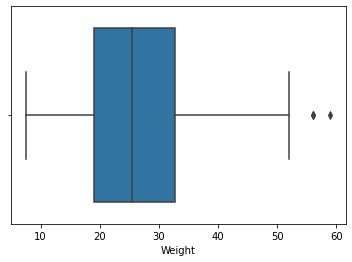

In [29]:
sns.boxplot(x = df['Weight'])

<AxesSubplot:xlabel='Weight1'>

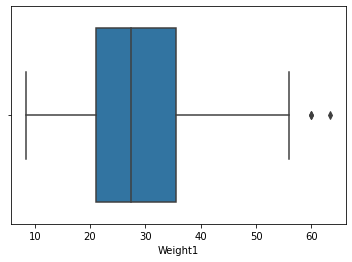

In [30]:
sns.boxplot(x = df['Weight1'])

<AxesSubplot:xlabel='Length'>

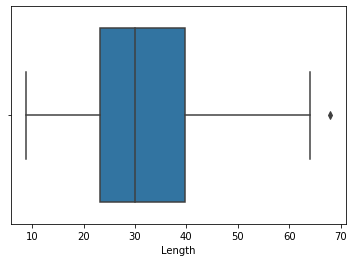

In [31]:
sns.boxplot(x = df['Length'])

<AxesSubplot:xlabel='Height'>

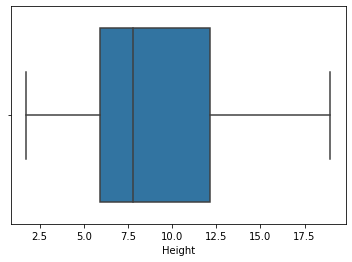

In [32]:
sns.boxplot(x = df['Height'])

<AxesSubplot:xlabel='Width'>

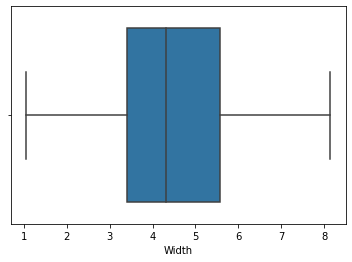

In [33]:
sns.boxplot(x = df['Width'])

<AxesSubplot:ylabel='Cost'>

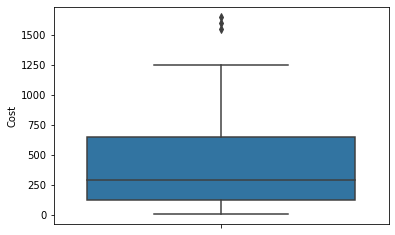

In [34]:
sns.boxplot(y = df['Cost'])

<AxesSubplot:>

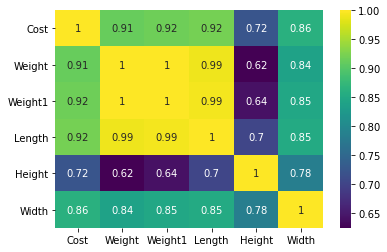

In [35]:
df_corr = df.corr()
sns.heatmap(df_corr, cmap='viridis', annot=True)

# Model Building


## OLS Approach :

In [73]:
### model OLS
ols_model = LinearRegression()
x_data = df.drop(['Cost'], axis = 1)
y = df['Cost']
ols_model.fit(x_data, y)
print("Coefficent is {}".format(ols_model.coef_))
print('Intercept is {}'.format(ols_model.intercept_))

print('')
print('')
print('')
ols_stats = sm.ols('Cost ~ Weight + Weight1 + Length + Height + Width', df).fit()
print(ols_stats.params)

Coefficent is [ 11.63095391  36.60710039 -23.9166695   23.79502612  21.02459158]
Intercept is -503.2062535260667



Intercept   -503.206254
Weight        11.630954
Weight1       36.607100
Length       -23.916669
Height        23.795026
Width         21.024592
dtype: float64


In [48]:
ols_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.07e-68
Time:                        15:47:12   Log-Likelihood:                -991.63
No. Observations:                 159   AIC:                             1995.
Df Residuals:                     153   BIC:                             2014.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -503.2063     30.167    -16.681      0.000    -562.804    -443.608
Weight        11.6310     21.700      0.536      0.593     -31.239      54.501
Weight1       36.6071     25.315      1.446      0.150     -13.405      86.619
Length       -23.9167     15.308     -1.562      0.120     -54.160       6.326
Height        23.7950      7.487      3.178      0.002       9.005      38.585
Width         21.0246     17.056      1.233      0.220     -12.671      54.720
==============================================================================
Omnibus:                       18.848   Durbin-Watson:                   0.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.651
Skew:                           0.773   Prob(JB):                     1.21e-05
Kurtosis:                       4.014   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
ols_stats.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.875    
Dependent Variable: Cost             AIC:                1995.2665
Date:               2021-12-01 15:47 BIC:                2013.6799
No. Observations:   159              Log-Likelihood:     -991.63  
Df Model:           5                F-statistic:        222.1    
Df Residuals:       153              Prob (F-statistic): 3.07e-68 
R-squared:          0.879            Scale:              15898.   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   -503.2063  30.1673 -16.6805 0.0000 -562.8045 -443.6080
Weight        11.6310  21.6998   0.5360 0.5927  -31.2390   54.5009
Weight1       36.6071  25.3150   1.4461 0.1502  -13.4049   86.6191
Length       -23.9167  15.3083  -1.5623 0.1203  -54.1596    6.3262
Height        23.7950   7.4866   3.1784 0.0018    9.0046   38.5854
Width         21.0246  17.0559   1.2327 0.2196  -12.6709   54.7201
------------------------------------------------------------------
Omnibus:               18.848       Durbin-Watson:          0.527 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       22.651
Skew:                  0.773        Prob(JB):               0.000 
Kurtosis:              4.014        Condition No.:          178   
==================================================================

"""

In [40]:
X = df.drop(['Cost'], axis=1)
Y = df['Cost']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)

In [41]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [66]:
print('Coefficent : ', model.coef_)
print('Intercept  : ', model.intercept_)

Coefficent :  [ 10.60671206  46.14478339 -31.86211685  27.81072171  14.71776896]
Intercept  :  -509.37520820614606


In [ ]:
ols_stats

In [43]:
Y_predict = model.predict(X_test)

In [50]:
import sklearn.metrics as metrics  # To calculate the R Square, MSE & RMSE Errors

mse = metrics.mean_squared_error(Y_test, Y_predict)
print('MSE : ', mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE : ', rmse)

r2 = metrics.r2_score(Y_test, Y_predict)
print('R Squared Error : ', r2)

MSE :  30115.110438744734
RMSE :  173.53705782553976
R Squared Error :  0.818204434307299


## Gradient Descent Approach :

In [55]:
x1 = df['Weight']
x2 = df['Weight1']
x3 = df['Length']
x4 = df['Height']
x5 = df['Width']

nos_data = float(len(x1)) # Total no of the data available for training
nos_data

159.0

In [75]:
coef_ = np.zeros(6)  # Coefficient for the linear model, initial values filled with 0
learn_rate = 0.001 # learning Rate

coef_

array([0., 0., 0., 0., 0., 0., 0.])

In [76]:
'''def createInitialValues(X): # Function used to generate initial values for coefficients and intercept
    vect = np.array([0.0 for x in range(X.shape[1]+1)])
    return vect

def gradientDescent(X, Y, iv, learn_rate):
    N = len(X)
    y = np.dot(X, iv[1:]) + iv[0]
    dW0 = (-2 / N) * sum(Y - y)
    dW = (-2 / N) * (np.dot(np.transpose(X), (Y - y)))
    iv[0] -= learn_rate * dW0
    iv[1:] -= learn_rate * dW
    
    y = np.dot(X, iv[1:]) + iv[0]
    loss = (1 / N * sum(val ** 2 for val in (Y - y)))
    
    return loss
    '''

In [126]:
def stocashtic_gradient_descent(vals_X,vals_y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = vals_X[rand_ind,:].reshape(1,vals_X.shape[1])
            y_i = vals_y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [134]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(vals_X),1)),vals_X]
theta,cost_history = stocashtic_gradient_descent(X_b,vals_y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (1,8) and (2,1) not aligned: 8 (dim 1) != 2 (dim 0)

In [ ]:
### SPLITTING THE DATA

In [84]:
vals_X = df.values[:, 1:6]
vals_y = df.values[:, 0]

m = len(vals_y)

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(6):
    print('x =', vals_X[i, ], ', y =', vals_y[i])

Total no of training examples (m) = 159 

x = [23.2  25.4  30.   11.52  4.02] , y = 242.0
x = [24.     26.3    31.2    12.48    4.3056] , y = 290.0
x = [23.9    26.5    31.1    12.3778  4.6961] , y = 340.0
x = [26.3    29.     33.5    12.73    4.4555] , y = 363.0
x = [26.5   29.    34.    12.444  5.134] , y = 430.0
x = [26.8        29.7        34.7        13.6024      4.42262051] , y = 450.0


In [85]:
def feature_normalize(vals_X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  #Note here we need mean of indivdual column here, hence axis = 0
  mu = np.mean(vals_X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(vals_X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
  X_norm = (vals_X - mu)/sigma
  return X_norm, mu, sigma

In [86]:
vals_X, mu, sigma = feature_normalize(vals_X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', vals_X[:5])

mu=  [26.25987261 28.41572327 31.23924051  8.93312405  4.42262051]
sigma=  [ 9.98911344 10.7163281  11.60922721  4.25952487  1.66222815]
X_norm=  [[-0.30632074 -0.28141386 -0.10674617  0.60731561 -0.24221736]
 [-0.22623355 -0.19742987 -0.00338011  0.83269286 -0.07039979]
 [-0.23624445 -0.17876676 -0.01199395  0.80869958  0.16452584]
 [ 0.00401711  0.0545221   0.19473816  0.89138485  0.01978037]
 [ 0.02403891  0.0545221   0.23780734  0.82424121  0.42796742]]


In [87]:
mu_testing = np.mean(vals_X, axis = 0) # mean
mu_testing

array([-2.17855084e-16, -1.45236723e-16,  2.79301390e-16,  1.34064667e-16,
       -3.35161668e-16])

In [89]:
sigma_testing = np.std(vals_X, axis = 0, ddof = 1) # mean
sigma_testing

array([1., 1., 1., 1., 1.])

In [95]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
vals_X = np.hstack((np.ones((m,1)), vals_X))
vals_X[:5]

array([[ 1.        ,  1.        , -0.30632074, -0.28141386, -0.10674617,
         0.60731561, -0.24221736],
       [ 1.        ,  1.        , -0.22623355, -0.19742987, -0.00338011,
         0.83269286, -0.07039979],
       [ 1.        ,  1.        , -0.23624445, -0.17876676, -0.01199395,
         0.80869958,  0.16452584],
       [ 1.        ,  1.        ,  0.00401711,  0.0545221 ,  0.19473816,
         0.89138485,  0.01978037],
       [ 1.        ,  1.        ,  0.02403891,  0.0545221 ,  0.23780734,
         0.82424121,  0.42796742]])

In [96]:
### COMPUTE THE COST

In [97]:
def compute_cost(vals_X, vals_y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = vals_X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, vals_y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  #J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [98]:
### GRADIENT DESCENT

In [99]:
def gradient_descent(vals_X, vals_y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = vals_X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, vals_y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * vals_X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(vals_X, vals_y, theta)  

  return theta, cost_history

In [104]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
theta = np.zeros(7)
iterations = 400;
alpha = 0.15;

In [105]:
theta, cost_history = gradient_descent(vals_X, vals_y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [200.42373418 200.42373418 100.37729435 100.48030767  36.58651542
  53.94459682  64.82696689]
First 5 values from cost_history = [54210.0857996  28060.59962559 17454.34165556 12531.9072718
 10152.3646622 ]
Last 5 values from cost_history = [7806.27262693 7806.17532943 7806.07809945 7805.98093696 7805.88384191]


In [ ]:
### VISUALIZATION

Text(0.5, 1.0, 'Convergence of gradient descent')

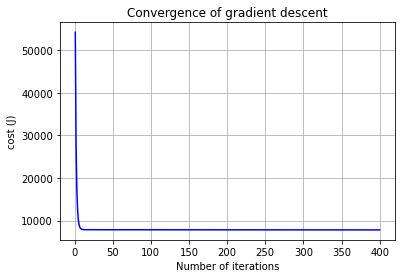

In [106]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

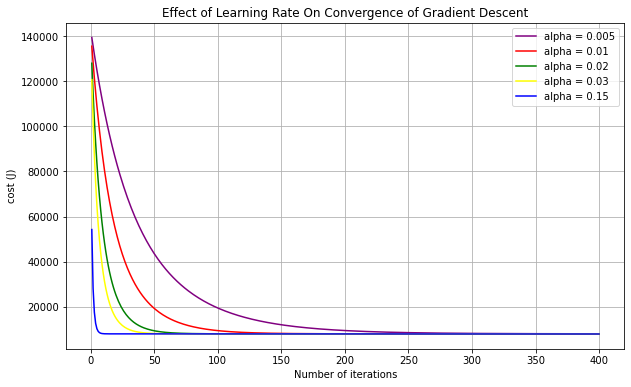

In [108]:
iterations = 400;
theta = np.zeros(7)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

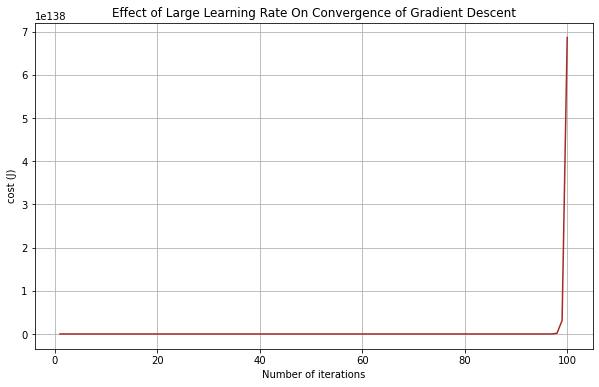

In [109]:
iterations = 100;
theta = np.zeros(7)

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(vals_X, vals_y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [ ]:
### TESTING THE MODEL

In [115]:
normalize_test_data = ((np.array([28, 30, 36, 15, 6]) - mu) / sigma)
normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
price = normalize_test_data.dot(theta)
print('Predicted Cost of :', price)

ValueError: shapes (6,) and (7,) not aligned: 6 (dim 0) != 7 (dim 0)

## Mini Batch Gradient Approach : 

## Stochastic Gradient Approach : 